In [1]:
%config Completer.use_jedi = False

In [2]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
THRESHOLD = 74

In [4]:
start = time.time()
data = pd.read_csv('train.csv')
end = time.time()
print(end - start)


1.115217685699463


In [5]:
from sklearn.utils import shuffle
data = shuffle(data)

In [6]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
32663,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31486,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40490,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38826,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.shape

(42000, 785)

[  5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 128 128  64   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  64  64 128 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  64   0  64 128 191 255 255 25

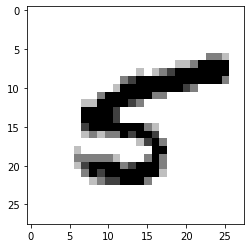

In [8]:
print(data.iloc[0].to_numpy())
pic = data.iloc[0].to_numpy()
plt.imshow(pic[1:].reshape(28,28), cmap="binary")


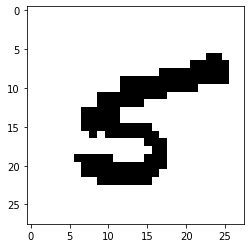

In [9]:

for i in range(1,len(pic)-1):
    if pic[i] >THRESHOLD:
        pic[i]=255
    else:
        pic[i]=0
plt.imshow(pic[1:].reshape(28,28), cmap="binary")

In [10]:
X = data.iloc [:,1:]#Frame (42000, 784)
y = data ["label"]#series (42000,)


In [11]:
from sklearn.model_selection import train_test_split 
# Split the dataset into a training set and a validation set

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_test, X_val, y_test, y_val = train_test_split(X_test, X_test, test_size=0.5, random_state=42)
# #train 29400, 0.70 of the data
# #test 6300, 0.3 of the data
# #validation 6300, 0.21 of the data 

# print(len(X_train),len(y_train))
# print(len(X_val),len(y_val))
# print(len(X_test),len(y_test))


sample = {"train": range(0,700), "val":range(700,850), "test":range(850,1000)}

X_train, X_test, X_val= X.iloc[sample["train"]], X.iloc[sample["test"]], X.iloc[sample["val"]]
y_train, y_test, y_val= y.iloc[sample["train"]], y.iloc[sample["test"]], y.iloc[sample["val"]]

print(X_train.iloc[1].to_numpy(), len(X_train.iloc[1].to_numpy()))

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  27 134 163 254
 206 130  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  68 237 253 253 253 253 254 153   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  62 238 253 253
 253 253 253 254 242  80   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   6 115 244 253 246 232 250 238 253 254 253 249 176  18
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  91 253 253 241
  81   4  73  27  88 206 253 253 253 210  37   0   

In [12]:
type(X_train)
X_train.shape

(700, 784)

In [13]:
# Applying the threshold condition
X_train=X_train.apply(lambda x: [ 0 if i<THRESHOLD else 1 for i in x], axis=1, result_type='broadcast')
X_test=X_test.apply(lambda x: [ 0 if i<THRESHOLD else 1 for i in x], axis=1, result_type='broadcast')
X_val=X_val.apply(lambda x: [ 0 if i<THRESHOLD else 1 for i in x], axis=1, result_type='broadcast')
#print(X_train.iloc[1].to_numpy())

<div class=" alert alert-warning"> 

- Training set size: 500 
- Test set size: 200 
- validation set size: 200 
    
</div>

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data

# Or better yet: use a pipeline!
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
est = make_pipeline(StandardScaler(), SGDClassifier())
est.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [15]:
from sklearn.metrics import accuracy_score
y_pred_test = est.predict(X_test)
tr_acc = accuracy_score(y_test, y_pred_test)
print(tr_acc)


0.8266666666666667


In [17]:
y_pred_val = est.predict(X_val)
tr_acc = accuracy_score(y_val, y_pred_val)
print(tr_acc)

0.44


In [18]:
y_pred_test = est.predict(X_test)
tr_acc = accuracy_score(y_test, y_pred_test)
print(tr_acc)

0.8266666666666667
